# ** Leitura e inspeção inicial dos dados**

In [ ]:
# bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
# importando os datasets de 5 anos do enade

enade_completo = pd.DataFrame()

files = ['/content/conceito_enade_2017.xlsx', '/content/conceito_enade_2018.xlsx', '/content/conceito_enade_2019.xlsx', '/content/conceito_enade_2021.xlsx', '/content/conceito_enade_2022.xlsx']

for file in files:
    df = pd.read_excel(file)
    enade_completo = pd.concat([enade_completo, df], ignore_index=True)


In [ ]:
# checando o dataset criado

enade_completo.head(20)

,Ano,Código da Área,Área de Avaliação,Código da IES,Nome da IES,Sigla da IES,Organização Acadêmica,Categoria Administrativa,Código do Curso,Modalidade de Ensino,...,Nota Padronizada - CE,Conceito Enade (Contínuo),Conceito Enade (Faixa),Observação,Grau Acadêmico,Nome da IES*,Sigla da IES*,Código do Município**,Município do Curso**,Sigla da UF**
0,2017,21.0,ARQUITETURA E URBANISMO,1.0,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Universidade,Pública Federal,44.0,Educação Presencial,...,4.403037,4.087300,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017,21.0,ARQUITETURA E URBANISMO,2.0,UNIVERSIDADE DE BRASÍLIA,UNB,Universidade,Pública Federal,132.0,Educação Presencial,...,4.126619,3.948979,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017,21.0,ARQUITETURA E URBANISMO,2.0,UNIVERSIDADE DE BRASÍLIA,UNB,Universidade,Pública Federal,1138293.0,Educação Presencial,...,3.496524,3.363622,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017,21.0,ARQUITETURA E URBANISMO,3.0,UNIVERSIDADE FEDERAL DE SERGIPE,UFS,Universidade,Pública Federal,99444.0,Educação Presencial,...,3.724285,3.679415,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017,21.0,ARQUITETURA E URBANISMO,4.0,UNIVERSIDADE FEDERAL DO AMAZONAS,UFAM,Universidade,Pública Federal,122640.0,Educação Presencial,...,3.375337,3.348468,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2017,21.0,ARQUITETURA E URBANISMO,5.0,UNIVERSIDADE FEDERAL DO PIAUÍ,UFPI,Universidade,Pública Federal,517.0,Educação Presencial,...,4.181019,4.138343,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2017,21.0,ARQUITETURA E URBANISMO,6.0,UNIVERSIDADE FEDERAL DE OURO PRETO,UFOP,Universidade,Pública Federal,112596.0,Educação Presencial,...,4.099964,3.943127,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2017,21.0,ARQUITETURA E URBANISMO,8.0,UNIVERSIDADE FEDERAL DE VIÇOSA,UFV,Universidade,Pública Federal,704.0,Educação Presencial,...,4.38405,4.444786,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2017,21.0,ARQUITETURA E URBANISMO,9.0,UNIVERSIDADE ESTADUAL DE LONDRINA,UEL,Universidade,Pública Estadual,750.0,Educação Presencial,...,3.532882,3.498883,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2017,21.0,ARQUITETURA E URBANISMO,10.0,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,PUCPR,Universidade,Privada sem fins lucrativos,864.0,Educação Presencial,...,2.886864,2.901348,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# checando o tamanho do dataset
print(enade_completo.shape)

(45655, 28)


In [ ]:
# checando colunas com valores vazios

valores_nulos = enade_completo.isnull().sum()
print(valores_nulos)

Ano                                     1
Código da Área                          3
Área de Avaliação                       3
Código da IES                           3
Nome da IES                         17896
Sigla da IES                        20479
Organização Acadêmica                   3
Categoria Administrativa                3
Código do Curso                         3
Modalidade de Ensino                    3
Código do Município                 17896
Município do Curso                  17896
Sigla da UF                         17896
Nº de Concluintes Inscritos             3
Nº  de Concluintes Participantes        3
Nota Bruta - FG                      2290
Nota Padronizada - FG                2350
Nota Bruta - CE                      2290
Nota Padronizada - CE                2327
Conceito Enade (Contínuo)            2290
Conceito Enade (Faixa)                147
Observação                          45483
Grau Acadêmico                      27762
Nome da IES*                      

As colunas depois de grau academico não foram concatenadas corretamente, temos que consertar isso:


In [ ]:
# Temos colunas com nome e nome* temos que dar merge nas colunas
# para Nome da IES
enade_completo['Nome da IES'] = enade_completo['Nome da IES'].combine_first(enade_completo['Nome da IES*'])

# para Sigla da IES
enade_completo['Sigla da IES'] = enade_completo['Sigla da IES'].combine_first(enade_completo['Sigla da IES*'])

# para Código do Município
enade_completo['Código do Município'] = enade_completo['Código do Município'].combine_first(enade_completo['Código do Município**'])

# para Município do Curso
enade_completo['Município do Curso'] = enade_completo['Município do Curso'].combine_first(enade_completo['Município do Curso**'])

In [ ]:
# para Sigla da UF
enade_completo['Sigla da UF'] = enade_completo['Sigla da UF'].combine_first(enade_completo['Sigla da UF** '])



In [ ]:
# rechecando os valores nulos
valores_nulos = enade_completo.isnull().sum()
print(valores_nulos)

Ano                                     1
Código da Área                          3
Área de Avaliação                       3
Código da IES                           3
Nome da IES                             3
Sigla da IES                         4309
Organização Acadêmica                   3
Categoria Administrativa                3
Código do Curso                         3
Modalidade de Ensino                    3
Código do Município                     3
Município do Curso                      3
Sigla da UF                             3
Nº de Concluintes Inscritos             3
Nº  de Concluintes Participantes        3
Nota Bruta - FG                      2290
Nota Padronizada - FG                2350
Nota Bruta - CE                      2290
Nota Padronizada - CE                2327
Conceito Enade (Contínuo)            2290
Conceito Enade (Faixa)                147
Observação                          45483
Grau Acadêmico                      27762
Nome da IES*                      

In [ ]:
# Dropando as colunas nome** que agora são redundantes
enade_completo.drop(['Nome da IES*', 'Sigla da IES*', 'Código do Município**', 'Município do Curso**', 'Sigla da UF** '], axis=1, inplace=True)

In [ ]:
# rechecando as colunas
enade_completo.columns

Index(['Ano', 'Código da Área', 'Área de Avaliação', 'Código da IES',
       'Nome da IES', 'Sigla da IES', 'Organização Acadêmica',
       'Categoria Administrativa', 'Código do Curso', 'Modalidade de Ensino',
       'Código do Município', 'Município do Curso', 'Sigla da UF',
       'Nº de Concluintes Inscritos', 'Nº  de Concluintes Participantes',
       'Nota Bruta - FG', 'Nota Padronizada - FG', 'Nota Bruta - CE',
       'Nota Padronizada - CE', 'Conceito Enade (Contínuo)',
       'Conceito Enade (Faixa)', 'Observação', 'Grau Acadêmico'],
      dtype='object')

In [ ]:
# salvando o dataset

enade_completo.to_excel('enade_completo.xlsx', index=False)

enade_completo.to_csv('enade_completo.csv', index=False)

In [ ]:
#recarregando o dataset criado - estou executando o  notebook em outro momento

enade_completo = pd.read_excel('/content/enade_completo.xlsx')

In [ ]:
# Vou checar agora quais linhas estão nulas na 'Nota Padronizada - FG' que tem o maior valor de linhas nulas nas colunas de notas

linhas_nulas = enade_completo[enade_completo['Nota Padronizada - FG'].isnull()]

linhas_nulas.head()

,Ano,Código da Área,Área de Avaliação,Código da IES,Nome da IES,Sigla da IES,Organização Acadêmica,Categoria Administrativa,Código do Curso,Modalidade de Ensino,...,Nº de Concluintes Inscritos,Nº de Concluintes Participantes,Nota Bruta - FG,Nota Padronizada - FG,Nota Bruta - CE,Nota Padronizada - CE,Conceito Enade (Contínuo),Conceito Enade (Faixa),Observação,Grau Acadêmico
92,2017,21.0,ARQUITETURA E URBANISMO,344.0,CENTRO UNIVERSITÁRIO UNA,UNA,Centro Universitário,Privada com fins lucrativos,1314241.0,Educação Presencial,...,1.0,0.0,NaN,NaN,NaN,NaN,NaN,SC,NaN,NaN
245,2017,21.0,ARQUITETURA E URBANISMO,1632.0,FACULDADE PITÁGORAS DE LONDRINA,NaN,Faculdade,Privada com fins lucrativos,1178659.0,Educação Presencial,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,SC,NaN,NaN
272,2017,21.0,ARQUITETURA E URBANISMO,2556.0,FIAM-FAAM - CENTRO UNIVERSITÁRIO,UNIFIAM-FAAM,Centro Universitário,Privada sem fins lucrativos,114805.0,Educação Presencial,...,2.0,1.0,NaN,NaN,NaN,NaN,NaN,SC,NaN,NaN
363,2017,72.0,TECNOLOGIA EM ANÁLISE E DESENVOLVIMENTO DE SIS...,322.0,UNIVERSIDADE PAULISTA,UNIP,Universidade,Privada com fins lucrativos,1180605.0,Educação Presencial,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,SC,NaN,NaN
367,2017,72.0,TECNOLOGIA EM ANÁLISE E DESENVOLVIMENTO DE SIS...,322.0,UNIVERSIDADE PAULISTA,UNIP,Universidade,Privada com fins lucrativos,1298977.0,Educação Presencial,...,1.0,0.0,NaN,NaN,NaN,NaN,NaN,SC,NaN,NaN


Pelas primeiras 40 linhas, parece que as instituições de ensino que tem valores nulos nas notas, tem valores de "Nº de Concluintes Participantes" entre 0 e 1, de acordo com os regulamentos do enade nenhuma instituição pode receber notas se 2 ou menos alunos aparecerem para prova, logo a falta de dados faz sentido

In [ ]:
# Vamos checar se nossa hipotese do Nº de Concluintes Participantes está correta

checagem = linhas_nulas['Nº  de Concluintes Participantes'].unique()

checagem



array([ 0.,  1., 14., 48.,  6., 46., 65., 13.,  7.,  5., 10.,  2.,  3.,
        4.,  8., nan, 29., 12., 50.,  9., 58., 20.])

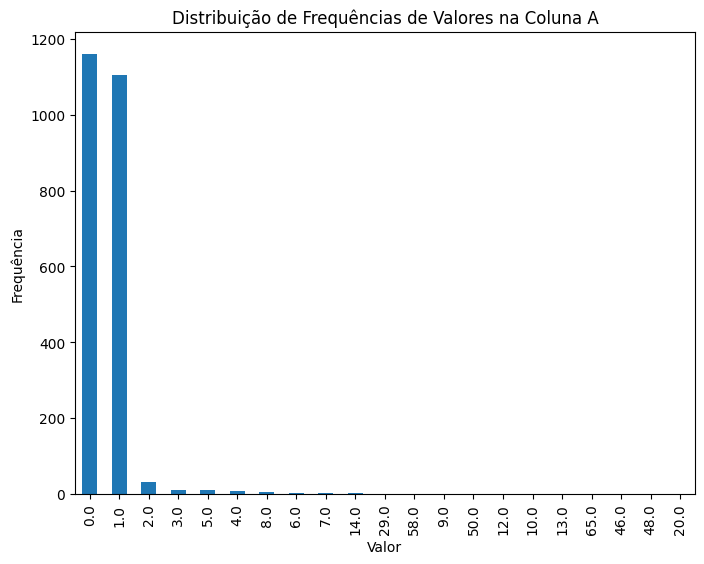

In [ ]:
# outros valores acima de 1 aparecem, eles estão em numero significativo? vamos checar as frequencias
frequencias = linhas_nulas['Nº  de Concluintes Participantes'].value_counts()

plt.figure(figsize=(8, 6))
frequencias.plot(kind='bar')
plt.title('Distribuição de Frequências de Valores na Coluna A')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.show()

Pela frequencia de valores acima de 1, podemos com segurança excluir todas as linhas com esses valores, ou podemos dar conceito enade 0. Optaremos por excluir as linhas nesta analise, já que a segunda opção alterará mais significativamente as analises, sem necessáriamente agregar uma informação real

In [ ]:
# removendo linhas com valores nulos

enade_limpo = enade_completo.dropna(subset=['Nota Padronizada - FG'])

valores_nulos = enade_limpo.isnull().sum()
print(valores_nulos)

Ano                                     0
Código da Área                          0
Área de Avaliação                       0
Código da IES                           0
Nome da IES                             0
Sigla da IES                         3913
Organização Acadêmica                   0
Categoria Administrativa                0
Código do Curso                         0
Modalidade de Ensino                    0
Código do Município                     0
Município do Curso                      0
Sigla da UF                             0
Nº de Concluintes Inscritos             0
Nº  de Concluintes Participantes        0
Nota Bruta - FG                         5
Nota Padronizada - FG                   0
Nota Bruta - CE                         5
Nota Padronizada - CE                  35
Conceito Enade (Contínuo)               5
Conceito Enade (Faixa)                  0
Observação                          43305
Grau Acadêmico                      26919
dtype: int64


A coluna observação é esperada ter a maior parte das linhas vazias, já que é uma coluna preenchida apenas com exceções e portanto pode ser removida.

Grau academico só surgiu como coluna a partir do enade de 2021, vamos manter essa coluna para analises comparativas entre graduações e tecnologos.

Sigla da IES é apenas um acrônimo dos nomes das instituições, portanto essa coluna pode ser removida sem grandes perdas de informação.

O resto das colunas apresenta um numero não significante de linhas nulas comparado ao tamanho do dataset,logo podemos remover essas linhas com pouca perda de informação



In [ ]:
# Vamos começar removendo colunas e checar os valores nulos da coluna
enade_limpo = enade_limpo.drop(columns=["Sigla da IES", "Observação"])

valores_nulos = enade_limpo.isnull().sum()
print(valores_nulos)

Ano                                     0
Código da Área                          0
Área de Avaliação                       0
Código da IES                           0
Nome da IES                             0
Organização Acadêmica                   0
Categoria Administrativa                0
Código do Curso                         0
Modalidade de Ensino                    0
Código do Município                     0
Município do Curso                      0
Sigla da UF                             0
Nº de Concluintes Inscritos             0
Nº  de Concluintes Participantes        0
Nota Bruta - FG                         5
Nota Padronizada - FG                   0
Nota Bruta - CE                         5
Nota Padronizada - CE                  35
Conceito Enade (Contínuo)               5
Conceito Enade (Faixa)                  0
Grau Acadêmico                      26919
dtype: int64


In [ ]:
# vamos remover as linhas nulas do resto das colunas agora

enade_limpo = enade_limpo.dropna(subset=["Nota Padronizada - CE"])

valores_nulos = enade_limpo.isnull().sum()
print(valores_nulos)

Ano                                     0
Código da Área                          0
Área de Avaliação                       0
Código da IES                           0
Nome da IES                             0
Organização Acadêmica                   0
Categoria Administrativa                0
Código do Curso                         0
Modalidade de Ensino                    0
Código do Município                     0
Município do Curso                      0
Sigla da UF                             0
Nº de Concluintes Inscritos             0
Nº  de Concluintes Participantes        0
Nota Bruta - FG                         5
Nota Padronizada - FG                   0
Nota Bruta - CE                         5
Nota Padronizada - CE                   0
Conceito Enade (Contínuo)               5
Conceito Enade (Faixa)                  0
Grau Acadêmico                      26919
dtype: int64


In [ ]:
enade_limpo = enade_limpo.dropna(subset=["Nota Bruta - FG"])

valores_nulos = enade_limpo.isnull().sum()
print(valores_nulos)

Ano                                     0
Código da Área                          0
Área de Avaliação                       0
Código da IES                           0
Nome da IES                             0
Organização Acadêmica                   0
Categoria Administrativa                0
Código do Curso                         0
Modalidade de Ensino                    0
Código do Município                     0
Município do Curso                      0
Sigla da UF                             0
Nº de Concluintes Inscritos             0
Nº  de Concluintes Participantes        0
Nota Bruta - FG                         0
Nota Padronizada - FG                   0
Nota Bruta - CE                         0
Nota Padronizada - CE                   0
Conceito Enade (Contínuo)               0
Conceito Enade (Faixa)                  0
Grau Acadêmico                      26919
dtype: int64


In [ ]:
# Dataset limpo para nossas analises, salvando

enade_limpo.to_excel('enade_limpo.xlsx', index=False)

enade_limpo.to_csv('enade_limpo.csv', index=False)

In [ ]:
# recarregando o dataset para podermos recomeçar o google colab desta parte:

enade_limpo = pd.read_excel('/content/enade_limpo.xlsx')

In [ ]:
# primeiro vamos normalizar as casas decimais das colunas de notas para facilitar a construção do gráfico de frequencias

enade_limpo['Nota Padronizada - FG'] = enade_limpo['Nota Padronizada - FG'].round(2)
enade_limpo['Nota Padronizada - CE'] = enade_limpo['Nota Padronizada - CE'].round(2)
enade_limpo['Nota Bruta - FG'] = enade_limpo['Nota Bruta - FG'].round(2)
enade_limpo['Nota Bruta - CE'] = enade_limpo['Nota Bruta - CE'].round(2)
enade_limpo['Conceito Enade (Contínuo)'] = enade_limpo['Conceito Enade (Contínuo)'].round(1)

enade_limpo.head()

,Ano,Código da Área,Área de Avaliação,Código da IES,Nome da IES,Organização Acadêmica,Categoria Administrativa,Código do Curso,Modalidade de Ensino,Código do Município,...,Sigla da UF,Nº de Concluintes Inscritos,Nº de Concluintes Participantes,Nota Bruta - FG,Nota Padronizada - FG,Nota Bruta - CE,Nota Padronizada - CE,Conceito Enade (Contínuo),Conceito Enade (Faixa),Grau Acadêmico
0,2017,21,ARQUITETURA E URBANISMO,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,Universidade,Pública Federal,44,Educação Presencial,5103403,...,MT,44,43,59.50,3.14009,62.97,4.403037,4.1,5,NaN
1,2017,21,ARQUITETURA E URBANISMO,2,UNIVERSIDADE DE BRASÍLIA,Universidade,Pública Federal,132,Educação Presencial,5300108,...,DF,141,128,61.36,3.416059,60.75,4.126619,4.0,5,NaN
2,2017,21,ARQUITETURA E URBANISMO,2,UNIVERSIDADE DE BRASÍLIA,Universidade,Pública Federal,1138293,Educação Presencial,5300108,...,DF,123,110,58.32,2.964918,55.68,3.496524,3.4,4,NaN
3,2017,21,ARQUITETURA E URBANISMO,3,UNIVERSIDADE FEDERAL DE SERGIPE,Universidade,Pública Federal,99444,Educação Presencial,2803609,...,SE,42,31,62.23,3.544802,57.52,3.724285,3.7,4,NaN
4,2017,21,ARQUITETURA E URBANISMO,4,UNIVERSIDADE FEDERAL DO AMAZONAS,Universidade,Pública Federal,122640,Educação Presencial,1302603,...,AM,64,50,60.36,3.267863,54.71,3.375337,3.4,4,NaN


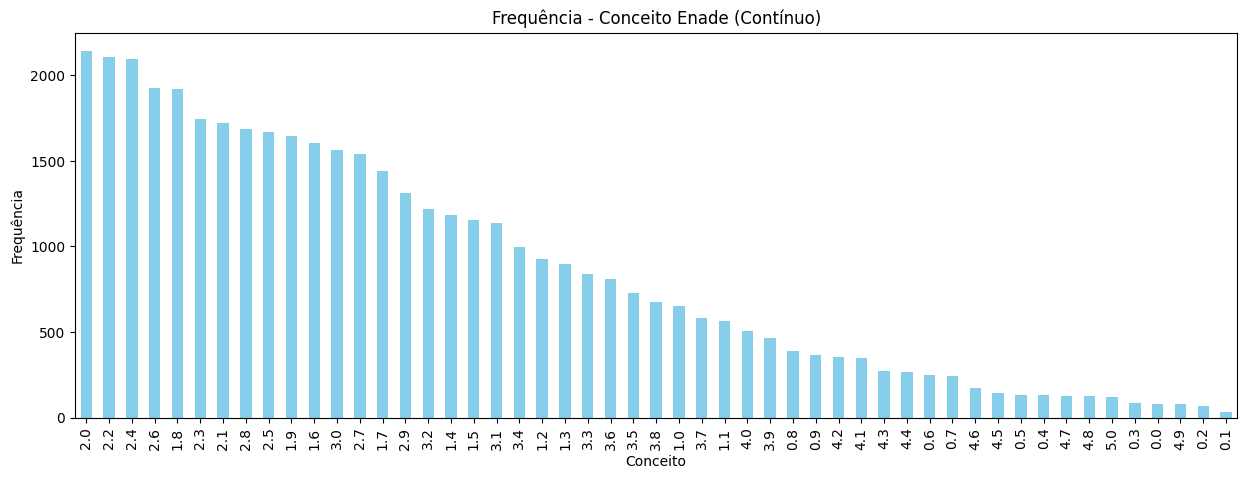

In [ ]:
# podemos começar a investigar o comportamento deste dataset, as notas do enade sendo o dado de maior significancia
# checando as frequencias das colunas "Conceito Enade (Contínuo)" e "Conceito Enade (Faixa)"

frequencias_conceito_continuo = enade_limpo['Conceito Enade (Contínuo)'].value_counts()
frequencias_conceito_faixa = enade_limpo['Conceito Enade (Faixa)'].value_counts()

plt.figure(figsize=(15, 5))

frequencias_conceito_continuo.plot(kind='bar', color='skyblue')

plt.title('Frequência - Conceito Enade (Contínuo)')

plt.xlabel('Conceito')

plt.ylabel('Frequência')

plt.show()


Faixa em torno de 2 são mais frequentes

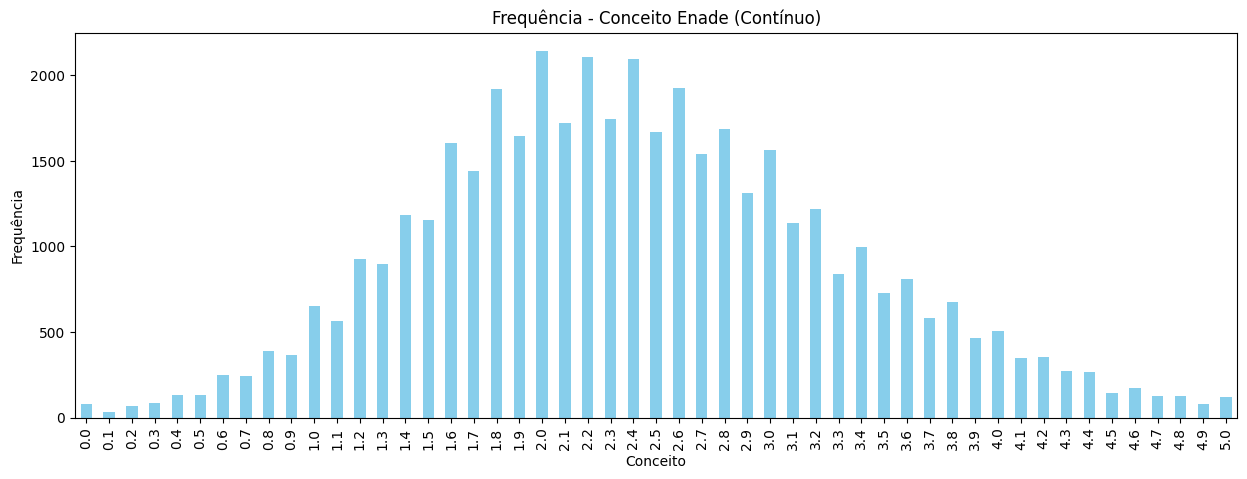

In [ ]:
# organizando o msm grafico em ordem crescente de notas, para checar o padrão de distribuição

frequencias_conceito_continuo = frequencias_conceito_continuo.sort_index()

plt.figure(figsize=(15, 5))

frequencias_conceito_continuo.plot(kind='bar', color='skyblue')

plt.title('Frequência - Conceito Enade (Contínuo)')

plt.xlabel('Conceito')

plt.ylabel('Frequência')

plt.show()


Distribuição similar a curva normal, nada inesperado

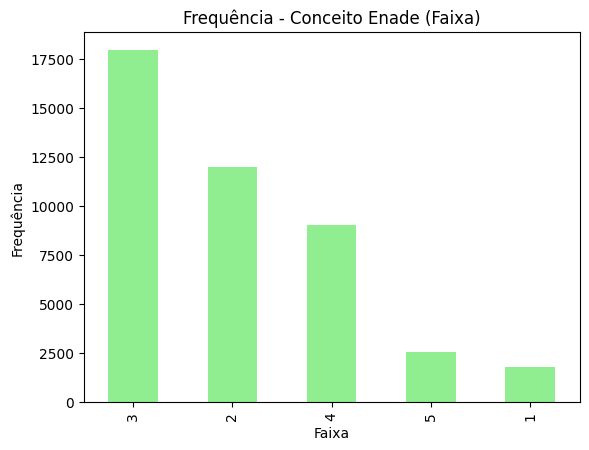

In [ ]:
# Agora para as notas na faixa
frequencias_conceito_faixa.plot(kind='bar', color='lightgreen')

plt.title('Frequência - Conceito Enade (Faixa)')

plt.xlabel('Faixa')

plt.ylabel('Frequência')

plt.show()

Diferente das notas continuas, temos o faixa de nota 3 como mais frequente, provavelmente porque o arredondamento das notas tem viés para faixas acima

Agora vamos investigar uam questão neste dataset:

Existe diferença significativa (10%) das notas do conceito Enade continuas entre as 5 regiões do Brasil?

In [ ]:
# mapeando as siglas dos estados para as regiões

regioes = {

    'AC': 'Norte', 'AL': 'Nordeste', 'AP': 'Norte', 'AM': 'Norte', 'BA': 'Nordeste',

    'CE': 'Nordeste', 'DF': 'Centro-Oeste', 'ES': 'Sudeste', 'GO': 'Centro-Oeste',

    'MA': 'Nordeste', 'MT': 'Centro-Oeste', 'MS': 'Centro-Oeste', 'MG': 'Sudeste',

    'PA': 'Norte', 'PB': 'Nordeste', 'PR': 'Sul', 'PE': 'Nordeste', 'PI': 'Nordeste',

    'RJ': 'Sudeste', 'RN': 'Nordeste', 'RS': 'Sul', 'RO': 'Norte', 'RR': 'Norte',

    'SC': 'Sul', 'SP': 'Sudeste', 'SE': 'Nordeste', 'TO': 'Norte'

}


# adicionando uma nova coluna para a região

enade_limpo['Região'] = enade_limpo['Sigla da UF'].map(regioes)


# calculando a média das notas por região

medias_regioes = enade_limpo.groupby('Região')['Conceito Enade (Contínuo)'].mean()


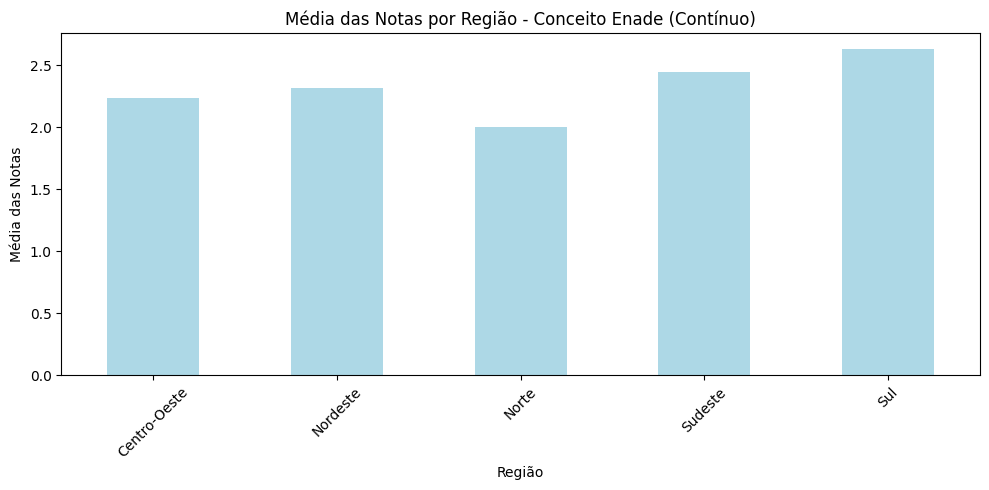

In [ ]:
# gerando o gráfico de comapração das médias das regiões

plt.figure(figsize=(10, 5))

medias_regioes.plot(kind='bar', color='lightblue')

plt.title('Média das Notas por Região - Conceito Enade (Contínuo)')

plt.xlabel('Região')

plt.ylabel('Média das Notas')

plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

# ** Análises e Pontos Interessantes**

# **- Existe diferença significativa (10%) das notas padronizadas continuas entre as 5 regiões do Brasil?**


In [ ]:
# gestando a significância das diferenças entre as médias

f_stat, p_value = stats.f_oneway(

    enade_limpo[enade_limpo['Região'] == 'Norte']['Conceito Enade (Contínuo)'],

    enade_limpo[enade_limpo['Região'] == 'Nordeste']['Conceito Enade (Contínuo)'],

    enade_limpo[enade_limpo['Região'] == 'Centro-Oeste']['Conceito Enade (Contínuo)'],

    enade_limpo[enade_limpo['Região'] == 'Sudeste']['Conceito Enade (Contínuo)'],

    enade_limpo[enade_limpo['Região'] == 'Sul']['Conceito Enade (Contínuo)']

)


# exibindo os resultados do teste

alpha = 0.10  # nível de significância de 10%

print(f'Estatística F: {f_stat}, Valor p: {p_value}')


if p_value < alpha:

    print("As diferenças entre as médias são significativas.")

else:

    print("As diferenças entre as médias não são significativas.")

Estatística F: 338.61267042433747, Valor p: 1.6337235112643615e-287
As diferenças entre as médias são significativas.


F value alto = grande variação entre as médias e p value baixissimo = chance do que foi mostrado ter sido gerado por acaso é muito baixa

# **- Existe diferença significativa (10%) das notas padronizadas continuas entre educação presencial e educação a distancia?**

In [1]:
import pandas as pd
from scipy import stats

# Carregar o dataset real
df = pd.read_csv('/content/dados_unificados.csv')

# Converter a coluna 'Nota Padronizada - CE' para numérico, substituindo erros por NaN
df['Nota Padronizada - CE'] = pd.to_numeric(df['Nota Padronizada - CE'], errors='coerce')

# Remover valores ausentes (NaNs) nas colunas 'Modalidade de Ensino' e 'Nota Padronizada - CE'
df = df.dropna(subset=['Modalidade de Ensino', 'Nota Padronizada - CE'])

# Separar os grupos de educação presencial e a distância
presencial = df[df['Modalidade de Ensino'] == 'Educação Presencial']['Nota Padronizada - CE']
distancia = df[df['Modalidade de Ensino'] == 'Educação a Distância']['Nota Padronizada - CE']

# Realizar o teste t de Student para verificar diferença significativa
t_stat, p_value = stats.ttest_ind(presencial, distancia, equal_var=False)

# Mostrar resultados
t_stat, p_value

<ipython-input-1-ecc94391104a>:5: DtypeWarning: Columns (0,16,18,21,22,23,24,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/dados_unificados.csv')


(13.214157685226903, 1.4275185702542503e-38)

# **- Existe diferença significativa (10%) das notas brutas continuas entre bacharelado e tecnologo?**

In [3]:
import pandas as pd
from scipy import stats

# Carregar o arquivo CSV, adicionando a opção low_memory=False para evitar o aviso de mixed types
file_path = '/content/dados_unificados.csv'  # Insira o caminho do seu arquivo CSV
df = pd.read_csv(file_path, low_memory=False)

# Filtrar os dados apenas para Bacharelado e Tecnológico
df_filtered = df[df['Grau Acadêmico'].isin(['Bacharelado', 'Tecnológico'])]

# Remover entradas com valores nulos na coluna "Nota Bruta - CE" e "Grau Acadêmico"
df_filtered = df_filtered.dropna(subset=['Nota Bruta - CE', 'Grau Acadêmico'])

# Garantir que a coluna de notas seja tratada como string antes de fazer substituições
df_filtered['Nota Bruta - CE'] = df_filtered['Nota Bruta - CE'].astype(str)

# Substituir vírgulas por pontos e remover valores inválidos como '#N/D'
df_filtered['Nota Bruta - CE'] = df_filtered['Nota Bruta - CE'].replace({'#N/D': None})
df_filtered['Nota Bruta - CE'] = df_filtered['Nota Bruta - CE'].str.replace(',', '.').astype(float)

# Separar os grupos de Bacharelado e Tecnólogo
bacharelado = df_filtered[df_filtered['Grau Acadêmico'] == 'Bacharelado']['Nota Bruta - CE']
tecnologico = df_filtered[df_filtered['Grau Acadêmico'] == 'Tecnológico']['Nota Bruta - CE']

# Aplicar o teste t de duas amostras para comparar as médias
t_stat, p_value = stats.ttest_ind(bacharelado, tecnologico)

# Nível de significância de 10%
significancia = 0.10
resultado_significativo = p_value < significancia

# Calcular as médias de cada grupo
media_bacharelado = bacharelado.mean()
media_tecnologico = tecnologico.mean()

# Exibir os resultados
print(f"Estatística t: {t_stat}")
print(f"Valor p: {p_value}")
print(f"A diferença é significativa a 10%? {'Sim' if resultado_significativo else 'Não'}")
print(f"Média das notas padronizadas de Bacharelado: {media_bacharelado}")
print(f"Média das notas padronizadas de Tecnológico: {media_tecnologico}")

Estatística t: -6.921895983969067
Valor p: 4.68941155625638e-12
A diferença é significativa a 10%? Sim
Média das notas padronizadas de Bacharelado: 40.14078764754978
Média das notas padronizadas de Tecnológico: 41.68523964944092


# **- Existe diferença significativa (10%) das notas padronizadas continuas entre fáculdades de educação publica e educação privada?**

In [2]:
import pandas as pd
from scipy import stats

# Carregar o dataset do notebook (substitua pelo caminho correto)
# O dataframe já foi carregado em uma célula anterior, mas vamos simular essa parte
# Supondo que a coluna 'Tipo de Educação' indica se a faculdade é pública ou privada
# E que as notas padronizadas estão em uma coluna como 'Nota Padronizada - FG'

# Vou usar uma variável simulada para representar esses dados (público/privado)
# Isso seria baseado no dataset real do notebook, que pode ter diferentes nomes de colunas
# Aqui vamos assumir que a coluna 'Tipo de Educação' e 'Nota Padronizada - CE' existem

# Simulando dados hipotéticos (seriam extraídos do dataset)
df = pd.DataFrame({
    'Tipo de Educação': ['pública', 'privada', 'pública', 'privada', 'pública', 'privada'],
    'Nota Padronizada - CE': [70, 65, 80, 85, 75, 90]
})

# Separar os grupos de educação pública e privada
publicas = df[df['Tipo de Educação'] == 'pública']['Nota Padronizada - CE']
privadas = df[df['Tipo de Educação'] == 'privada']['Nota Padronizada - CE']

# Realizar o teste t de Student para verificar diferença significativa
t_stat, p_value = stats.ttest_ind(publicas, privadas, equal_var=False)

# Mostrar resultados
t_stat, p_value  # Retornar o valor estatístico e o p-value para análise.

(-0.6123724356957945, 0.5903318162661182)

# **##  Extra, Modelo de Machine Learning**

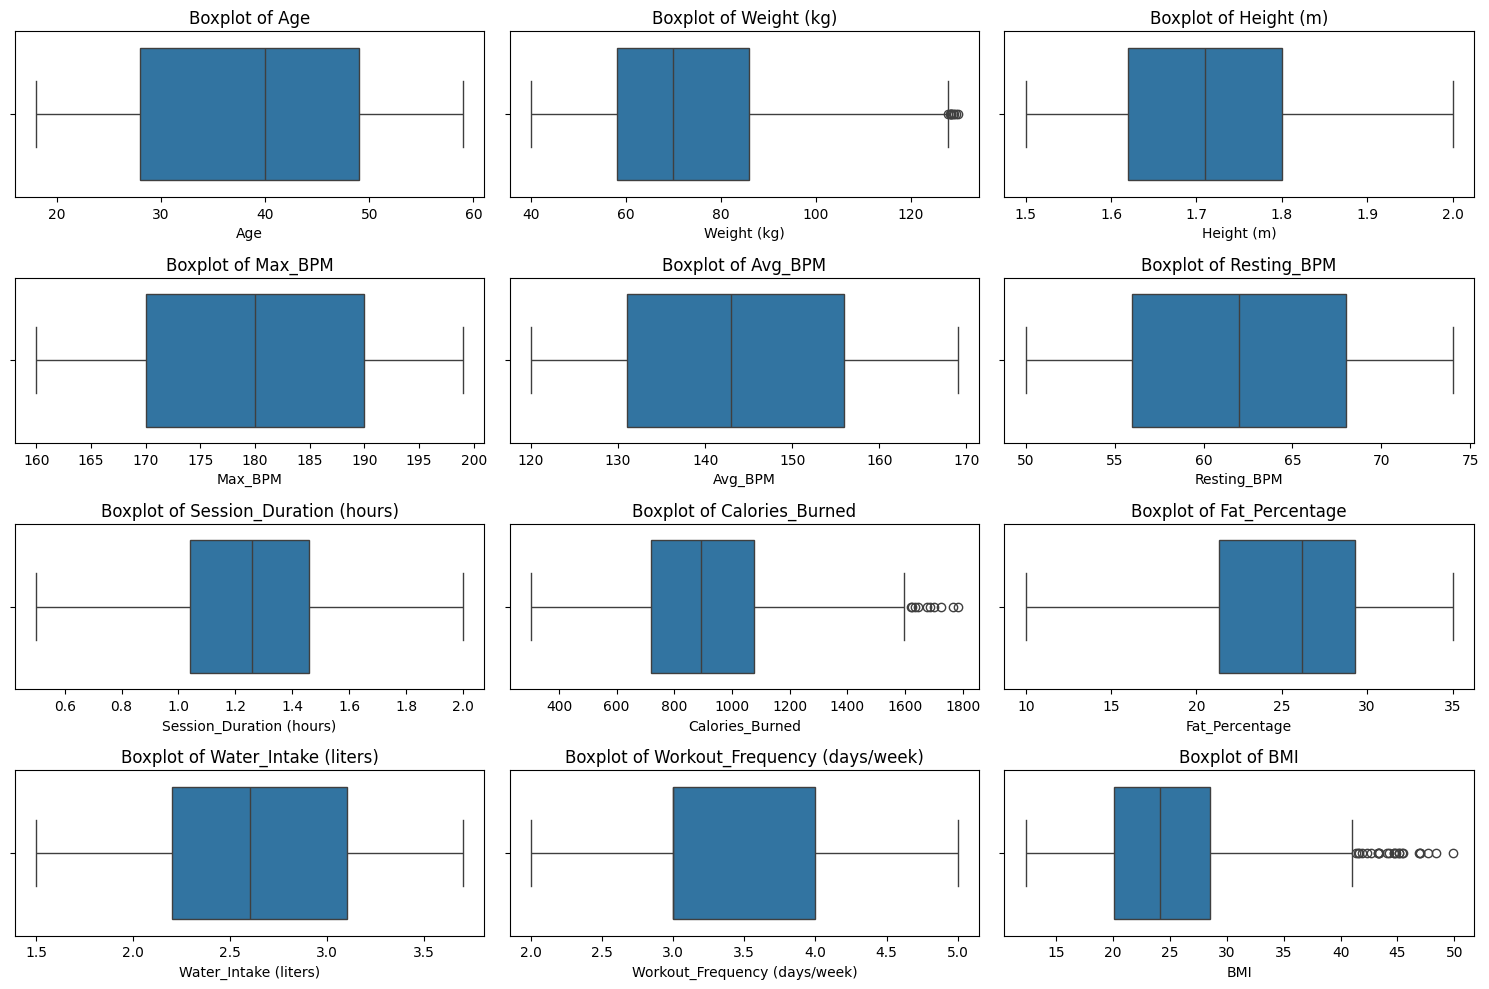

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
file_path = '/content/gym_members_exercise_tracking.csv'
data = pd.read_csv(file_path)
# Plotar boxplots para identificar outliers nas variáveis numéricas
numerical_columns = ['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
                     'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
                     'Fat_Percentage', 'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'BMI']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


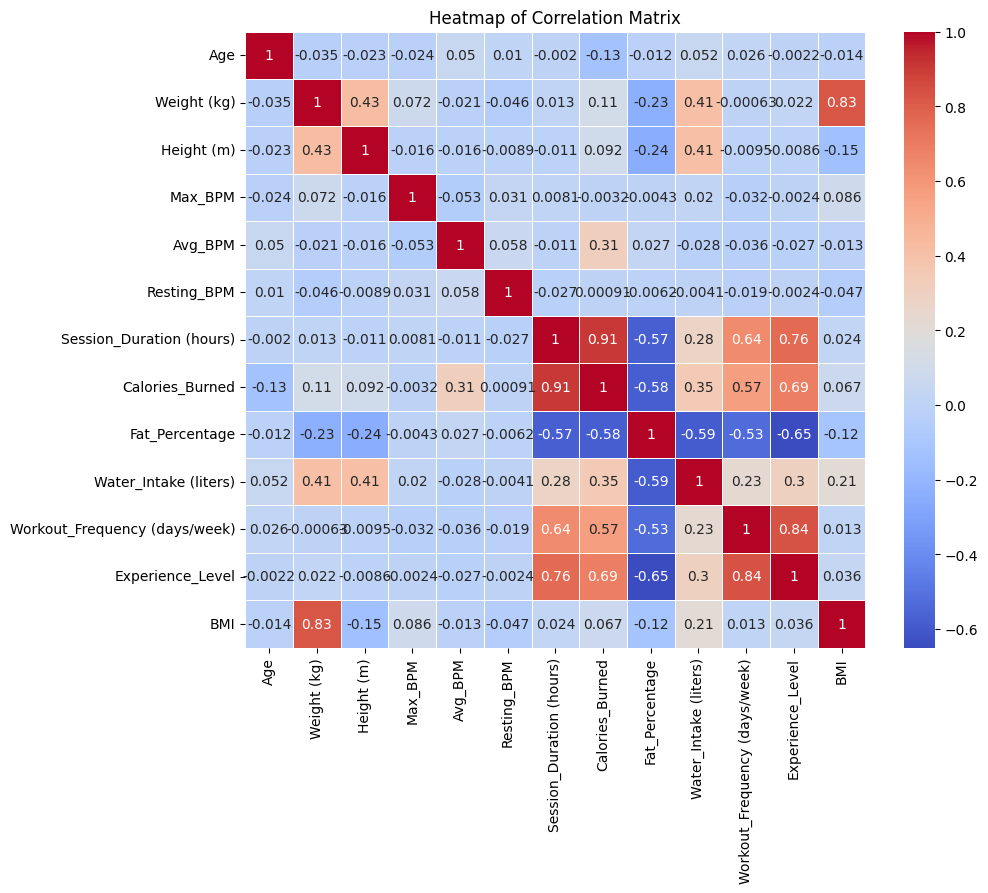

In [5]:
# Função para remover outliers com base no critério do IQR (Intervalo Interquartil)
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Remover outliers das colunas numéricas
data_cleaned = remove_outliers(data, numerical_columns)

# Selecionar apenas as colunas numéricas para a correlação
numerical_data = data_cleaned.select_dtypes(include=['number'])

# Gerar mapa de calor de correlação após a limpeza
plt.figure(figsize=(10, 8))
correlation_matrix = numerical_data.corr() # Calcular a correlação apenas para dados numéricos.
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap of Correlation Matrix")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Root Mean Squared Error (RMSE): 57.9341968620895
R-squared (R²): 0.9538295667346774


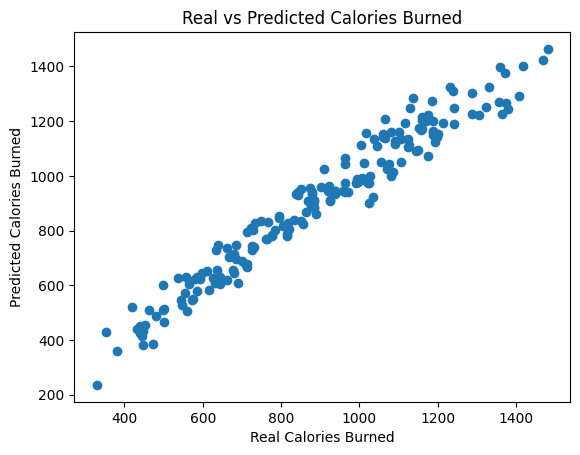

In [6]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Colunas numéricas para análise de outliers
numerical_columns = ['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
                     'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
                     'Fat_Percentage', 'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'BMI']

# Função para remover outliers com base no critério do IQR (Intervalo Interquartil)
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Remover outliers das colunas numéricas
data_cleaned = remove_outliers(data, numerical_columns)

# Seleção das variáveis mais correlacionadas com 'Calories_Burned' para o modelo preditivo
features = ['Session_Duration (hours)', 'Weight (kg)', 'BMI', 'Max_BPM', 'Avg_BPM']
target = 'Calories_Burned'

# Separar as variáveis independentes (X) e dependente (y)
X = data_cleaned[features]
y = data_cleaned[target]

# Dividir os dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instanciar o modelo de regressão linear
model = LinearRegression()

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões nos dados de teste
y_pred = model.predict(X_test)

# Avaliar o modelo com métricas como RMSE e R²
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

# Opcional: Plotar a relação real vs predita
plt.scatter(y_test, y_pred)
plt.xlabel("Real Calories Burned")
plt.ylabel("Predicted Calories Burned")
plt.title("Real vs Predicted Calories Burned")
plt.show()
